In [21]:
from bot import main

In [22]:
main()

/home/upcore/anaconda3/envs/modeling_control/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/upcore/anaconda3/envs/modeling_control/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


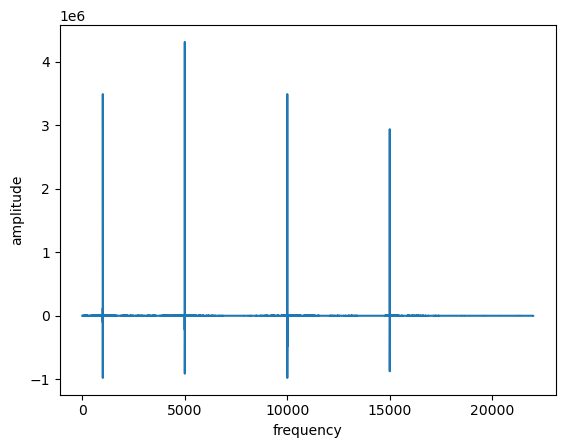

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# rate, aud_data = scipy.io.wavfile.read(file)
rate = 44000
ii = np.arange(0, 9218368)
t = ii / rate
aud_data = np.zeros(len(t))
for w in [1000, 5000, 10000, 15000]:
    aud_data += np.cos(2 * np.pi * w * t)

# From here down, everything else can be the same
len_data = len(aud_data)

channel_1 = np.zeros(2**(int(np.ceil(np.log2(len_data)))))
channel_1[0:len_data] = aud_data

fourier = np.fft.fft(channel_1)
w = np.linspace(0, 44000, len(fourier))

# First half is the real component, second half is imaginary
fourier_to_plot = fourier[0:len(fourier)//2]
w = w[0:len(fourier)//2]

plt.figure(1)

plt.plot(w, fourier_to_plot)
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.show()

2210


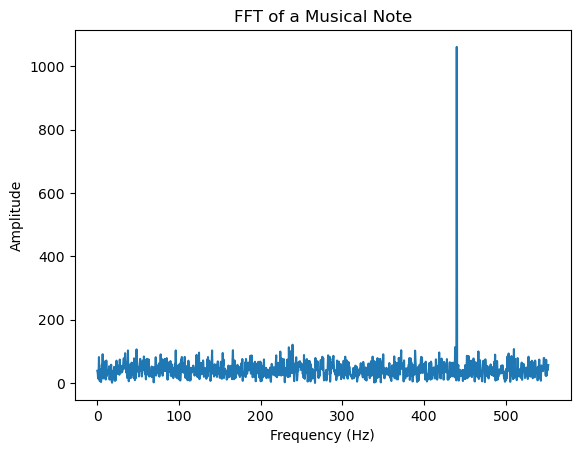

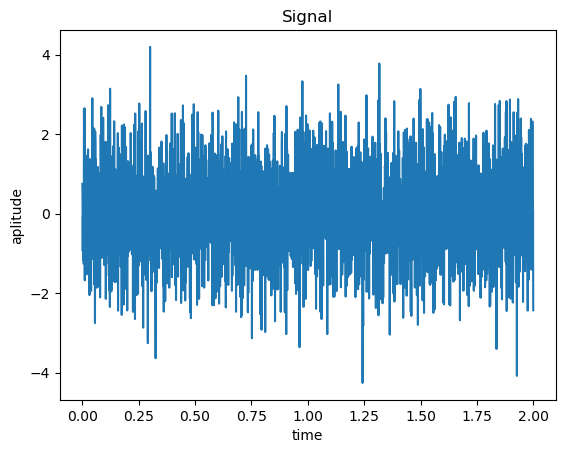

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Generating a sample musical note signal
fs = 1105  # Sampling frequency (Hz)
duration = 2  # seconds
frequency = 440  # A4 note frequency (Hz)
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
signal = np.sin(2 * np.pi * frequency * t) + np.random.normal(0, 1, len(t))  # Signal with noise

# Applying FFT
fft_result = np.fft.fft(signal)
freq = np.fft.fftfreq(t.shape[-1], d=1/fs)

n = len(freq)
print(n)

# Plotting the spectrum
plt.plot(freq[0 : n//2], np.abs(fft_result[0 : n//2]))
plt.title('FFT of a Musical Note')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


plt.plot(t, signal)
plt.title('Signal')
plt.xlabel('time')
plt.ylabel('aplitude')
plt.show()

In [20]:
np.abs(fft_result[0 : n//2]).max()

1060.8617875912562

number of channels = [       0        0        0 ... -2398325 -1198833 -1569946]
length = 1.8535s


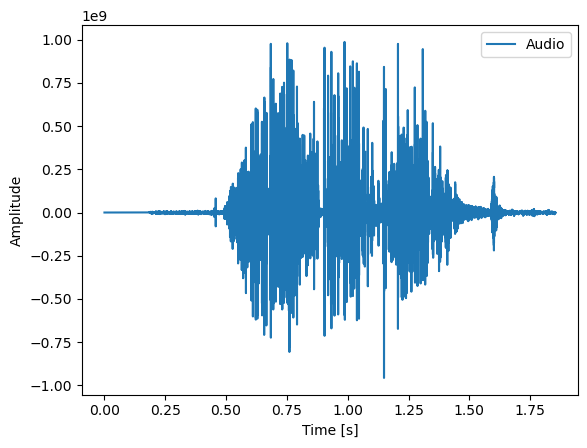

In [39]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
#reading the sample audio rate and the data
rate, data = wavfile.read('audio_storage/AwACAgIAAxkBAAMxZ0IMFS4JSIdX5fwin4SweG0CnEEAAv1oAAIs6hBKlqwSf3Jlbjg2BA.wav')
print(f"number of channels = {data}")
length = data.shape[0] / rate
print(f"length = {length}s")
#plotting the audio time and amplitude
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data)
plt.title('Audio Signal (in time domain)')
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.savefig('signal.png')
plt.show()

In [59]:
def plot_fft(signal: np.ndarray, time: np.ndarray):
    steps_number = len(time)
    duration = time.max()
    # Applying FFT
    fft_result = np.fft.fft(signal)
    freq = np.fft.fftfreq(time.shape[-1], d=duration/steps_number)
    
    return freq[0 : steps_number//2], np.abs(fft_result[0 : steps_number//2])

In [106]:
freq_my, fft_my = plot_fft(data, time)

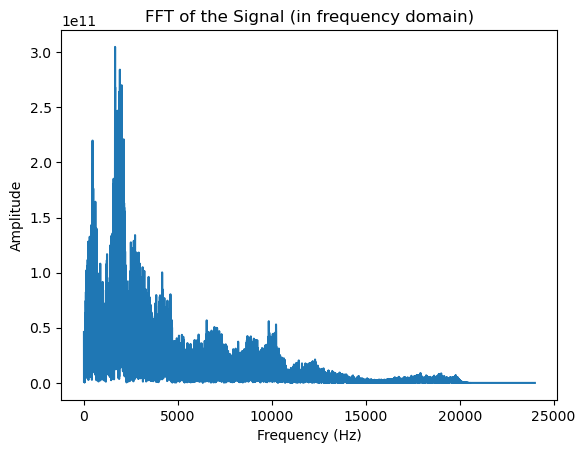

In [107]:
# Plotting the spectrum
plt.plot(freq_my, fft_my)
plt.title('FFT of the Signal (in frequency domain)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.savefig('fft.png')
plt.show()

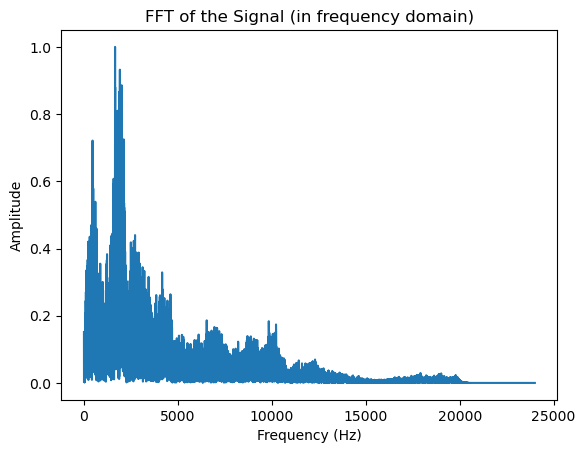

In [108]:
plt.plot(freq_my, fft_my / fft_my.max())
plt.title('FFT of the Signal (in frequency domain)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.savefig('fft.png')
plt.show()

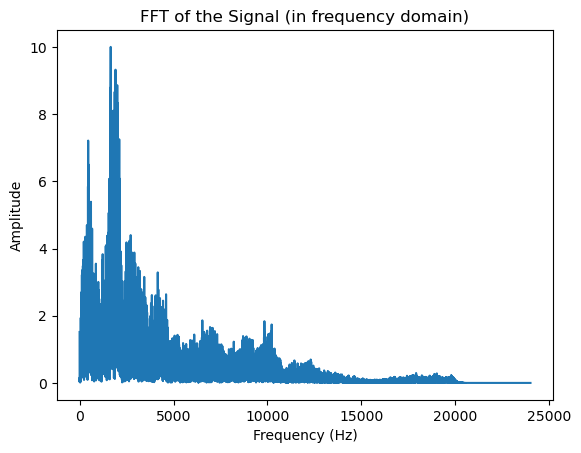

In [125]:
plt.plot(freq_my, fft_my_sc)
plt.title('FFT of the Signal (in frequency domain)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.savefig('fft.png')
plt.show()

In [110]:
def softmax(x: np.ndarray):
    return np.exp(x)/sum(np.exp(x))

In [112]:
fft_my_sc = 10 * fft_my / fft_my.max()

In [126]:
entropy = np.dot(softmax(fft_my_sc), np.log(sum(np.exp(fft_my_sc))) - fft_my_sc)

In [127]:
entropy

7.023798610889333

In [128]:
softmax(fft_my_sc)

array([1.53827697e-05, 3.93566788e-06, 4.01728723e-06, ...,
       3.37854939e-06, 3.37850716e-06, 3.37851896e-06])

In [129]:
np.log(sum(np.exp(fft_my_sc))) - fft_my_sc

array([11.08226253, 12.44542996, 12.4249037 , ..., 12.59806411,
       12.59807661, 12.59807312])